#Eligibility Traces  

Mario Fiorino

Nelle tecniche di RL basate sull "eligibility traces", l'agente conserva una "traccia" in memoria di tutte le azioni e gli stati incontrati nel corso dell'interazione con l'ambiente. Questa traccia viene progressivamente elaborata nel tempo, precisamente è soggetta a un processo di decadimento, che dipende sia dalla frequenza delle visite sia dalla loro "recency".

L'aggiornamento complessivo della value-fuction dipenderà oltre che dal reward immediato e l'expected rewards, anche da tale "traccia".

L'idea alla base del meccanismo "eligibility traces" è semplice: si usa un vettore (ovvero una porzione di memoria), denotato con $e_t(s)$ , che associa a ciascuno stato $s$ (e se si lavora con una Q-value anche a ciascuna azione $a$ ), ad un certo tempo $t$ un valore definito come :


$e_0(s)← 0 \; \; \; ∀s∈S$

$ e_t(s) ← λ γ e_{t-1}(s) + \mathbf{I} (s = S_t) \; \; \;  ∀s∈S $

dove:

il primo rigo ci dice che all'inizio del training l "eligibility traces" per ogni stato ha valore zero.


$S_t$ è stato visitato al tempo $t$. In altri termini " the actual state at time t" .


$γ$ è il discount rate, $ 0 \leq γ \leq 1 $


$λ$ è il  trace decay parameter, $ 0 \leq λ \leq 1 $

$\mathbf{I} (S_t = s)$ è l' indicator function, che vale $1$ quando la condizione al suo interno è vera, $0$ altrimenti.


L'eligibility trace può essere utilizzato come fattore di scala per il TD error:

$ δ_t=r_{t+1}+γ v_π (s_{t+1})- v(s_t)$

L'aggiornamento della funzione di valore, che ora considera anche il parametro "eligibility trace", diventa:

$v_π(s)←v_π(s)+ α [δ_t e_t(s)] \; \; \; ∀s∈S$

sia $α$, lo step-size, o lerning rate, che viene utilizzato per controllare l'entità  dell'aggiornamento.
Si noti, che così facendo, ad ogni time-step $t$, dobbiamo aggiornare le stime della value function per ogni stato $s$.

$\;$

Tale meccanismo tiene conto di due fattori:

Frequency heuristic: assegna più credito agli stati più frequenti

Recency heuristic: assegna più credito agli stati più recenti

Di fatto si tiene traccia di quanto frequente e quanto recente un certo stato è stato visitato. Gli stati che non vengono visitati o che non vengono visitati da un po' avranno un valore di $e_t(s)$ pari o vicino a zero, il che significa che la nostra stima della value function per quegli stati non cambierà molto.

$\;$

NOTA

La formulazione esposta è detta "Accumulating eligibility trace". Sutton, nel paper : https://link.springer.com/article/10.1007/BF00114726
ne cita un altra " Replacing eligibility trace",  che, invece di sommare $1$ quando si visita uno stato, resetta il valore $e_t(s)$ ad $1$: cioè :

$e_0(s)← 0 \; \; \; ∀s∈S$

if $ s = S_t : e_t(s) ← 1 $

if $ s \neq S_t : e_t(s) ← λ γ e_{t-1}(s)  \; \; \;  ∀s∈S $

$\;$

Se si lavora con i metodi di **Value Function Approximation**, l'eligibility trace è un vettore $\mathbf{z}_t$,  che ha lo stesso numero di componenti del weight vector $\mathbf{w}_t$. Sutton sintetizza molto bene il meccanismo nel suo testo:

*The mechanism is a short-term memory vector, the eligibility trace $\mathbf{z}_t \in R^d$, that parallels the long-term weight vector $\mathbf{w}_t\in R^d$. The rough idea is that when a component of $\mathbf{w}_t$ participates in
producing an estimated value, then the corresponding component of $\mathbf{z}_t$ is bumped up and then begins to fade away.*

*Learning will then occur in that component of $\mathbf{w}_t$ if a nonzero TD error occurs before the trace falls back to zero. The trace-decay parameter  $λ \in [0, 1]$ determines the rate at which the trace falls.*

Nella pratica:


$\mathbf{z}_t$ viene inizializzato a zero all'inizio di un episodio; poi viene incrementato a ogni time-step $t$ con il valore del gradiente della value-fuction, e ridotto proporzionale ai fattori $γλ$ sopra definiti. In simboli:

$\mathbf{z}_{-1} = \mathbf{0}$

$\mathbf{z}_{t} = γλ \mathbf{z}_{t-1} + \nabla v(S_t,\mathbf{w}_t) \; \;  \; 0 \leq  t  \leq Terminal$

Sia il TD error:

$ δ_t = r_{t+1} +γ v(s_{t+1},\mathbf{w}_t)- v(s_t,\mathbf{w}_t )$

Il weight vector sarà così aggiornato

$\mathbf{w}_{t+1} = \mathbf{w}_{t} + α δ_t \mathbf{z}_{t} $

**Convergenza per i metodi Value Function Approximation**

Il testo di Sutton (PDF 317) afferma che nei casi di approssimazioni lineari:
*has been proved to converge in the on-policy case if the step-size parameter is reduced over time according to the usual conditions (2.7). Just as discussed
in Section 9.4, convergence is not to the minimum-error weight vector, but to a nearby weight vector that depends on λ.*

*...In practice, however,  λ = 1 is often the poorest choice ...*

$\;$

**Vantaggi**

Il testo di Sutton (Cap 12.13) dichiara che:

*Methods using eligibility traces require more computation than one-step methods, but in return they offer significantly faster learning, particularly when rewards are delayed by many steps. Thus it often makes sense to use eligibility traces when data are scarce and cannot be repeatedly processed, as is often the case in online applications.*

*On the other hand, in offline applications in which data can be generated cheaply, perhaps from an
inexpensive simulation, then it often does not pay to use eligibility traces. In these cases the objective is not to get more out of a limited amount of data, but simply to process as much data as possible as quickly as possible. In these cases the speedup per datum due to
traces is typically not worth their computational cost, and one-step methods are favored.*


$\;$

Ref :

Reinforcement Learning: An Introduction, Richard S. Sutton and Andrew G. Barto, Second Edition - MIT Press, Cambridge, 2018. PDF 309

https://amreis.github.io/ml/reinf-learn/2017/11/02/reinforcement-learning-eligibility-traces.html


http://incompleteideas.net/book/first/ebook/node75.html

Potrebbe interessare:

Investigating Recurrence and Eligibility Traces in
Deep Q-Networks

https://arxiv.org/pdf/1704.05495




<div>
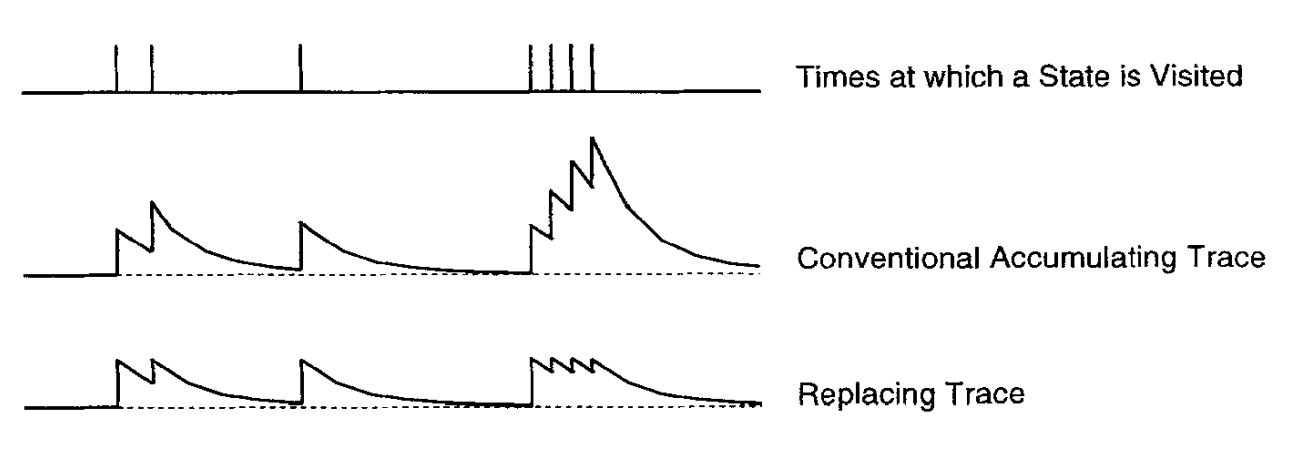
</div>

**Implementation Issues**

Cap 12.12  - PDF 338; il testo di Sutton afferma:

*It might at first appear that tabular methods using eligibility traces are much more complex than one-step methods. A naive implementation would require every state (or state-action pair) to update both its value estimate and its eligibility trace on every time
step. This would not be a problem for implementations on single-instruction, multipledata, parallel computer or in plausible artificial neural network implementations, but it is a problem for implementations on conventional serial computers. Fortunately, for typical values of λ and $\gamma$ the eligibility traces of almost all states are almost always nearly zero; only those states that have recently been visited will have traces significantly
greater than zero and only these few states need to be updated to closely approximate these algorithms.*

*In practice, then, implementations on conventional computers may keep track of and update only the few traces that are significantly greater than zero. Using this trick, the computational expense of using traces in tabular methods is typically just a few times
that of a one-step method.*

*Note that the tabular case is in some sense the worst
case for the computational complexity of eligibility traces. When function approximation
is used, the computational advantages of not using traces generally decrease.*



## Coding with look-up table

### Moduli

In [ ]:
# codice di riferimento : https://github.com/moripiri/Reinforcement-Learning-on-FrozenLake/blob/master/Chapter6.ipynb
# Teoria : http://incompleteideas.net/book/first/ebook/node77.html

import gym

import random
import numpy as np

import matplotlib.pyplot as plt

import copy

import warnings
warnings.filterwarnings('ignore')

### SARSA with Eligibility Traces

or SARSA($\lambda$) algorithm

In [ ]:
class SARSA_lamda:
    def __init__(self, env, gamma=0.9, lamda=0.5, alpha=0.1,  eps=0.3, max_episode=100):

        self.env = env
        self.nrow = env.nrow
        self.ncol = env.ncol

        self.state_dim = env.observation_space.n # self.nrow * self.ncol
        self.action_dim = env.action_space.n

        self.gamma = gamma
        self.lamda = lamda
        self.alpha = alpha
        self.eps = eps
        self.max_episode = max_episode

        self.q = np.zeros([self.state_dim, self.action_dim])
        # For educational purposes, self.q_c is used solely as a baseline comparison,
        # operating independently of the factor "eligibility trace"
        self.q_c = np.zeros([self.state_dim, self.action_dim])

    def action(self, s):
        if np.random.random() < self.eps:
            supp = {0,1,2,3}.difference({np.argmax(self.q[s, :])})
            su = list(supp)
            action = np.random.choice(su)
        else:
            action = np.argmax(self.q[s,:]) # act greedy on Q
        return action

    def out_q(self):
      #print(self.q)
      return self.q, self.q_c

    def run(self):

        for episode in range(1,self.max_episode+1):

            #  Sutton's book initialize eligibility trace here:
            eligibility = np.zeros([self.state_dim, self.action_dim])
            # Putting this line of code before the episode loop, in this case, seems to slow down convergence

            # Epsilon greedy policy
            if episode % (self.max_episode/5) == 0:
                self.eps = self.eps - 0.05
            #   print("eps=",self.eps)

            observation = self.env.reset()
            action = self.action(observation)
            done = False

            episode_reward = 0
            local_step = 1

            while not done:

                next_observation, reward, done, _ = self.env.step(action)

                ###Reward setting
                # give penalty for staying in ground
                if reward == 0:
                    reward = -0.001

                # give penalty for falling into the hole
                if done and next_observation != 15:
                    reward = -1

                if observation == next_observation: # prevent meaningless actions
                    reward = -1

                ######

                next_action = self.action(next_observation)

                delta = reward + self.gamma * self.q[next_observation, next_action] - self.q[observation, action]

                self.q_c[observation, action] += self.alpha * delta

                # Eligibility and Q update
                for i in range(self.state_dim):
                    for j in range(self.action_dim):

                        if i == observation and j == action:
                           eligibility[i, j] = self.gamma * self.lamda * eligibility[i, j] + 1
                        else:
                           eligibility[i, j] = self.gamma * self.lamda * eligibility[i, j]

                        self.q[i, j] += self.alpha * delta * eligibility[i, j]

                #To clarify the mechanism eligibility trace
                if (episode == 1)  or  (episode == 20) or (episode == 40) or (episode == 50):
                   rounded   =  [list(np.round(x,4)) for x in eligibility]
                   rounded_q =  [list(np.round(x,4)) for x in self.q]
                   rounded_qc = [list(np.round(x,4)) for x in self.q_c]
                   print("")
                   print("Episode: {} - Step: {}".format(episode, local_step))
                   print("Elig: {}".format(rounded)    )
                   print("Q   : {}".format(rounded_q)  )
                   print("Q_c : {}".format(rounded_qc) )

                observation = next_observation
                action = next_action

                episode_reward += reward
                local_step += 1


            #print("Episode: {} -> Step: {}, Episode_reward: {}".format(episode, local_step, episode_reward))





In [ ]:
env = gym.make("FrozenLake-v1", render_mode='rgb_array', is_slippery=False)#define the environment.

sarsa_lamda_config = {
    'env': env,
    'gamma': 0.9,
    'lamda': 0.5,
    'alpha': 0.1,
    'eps': 0.3,
    'max_episode': 50
}

sarsa_lamda = SARSA_lamda(**sarsa_lamda_config)
sarsa_lamda.run()


Episode: 1 - Step: 1
Elig: [[1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0]]
Q   : [[-0.1, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0]]
Q_c : [[-0.1, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0

In [ ]:
action_value_grid, q_comparison = sarsa_lamda.out_q()

### Rendering Q value

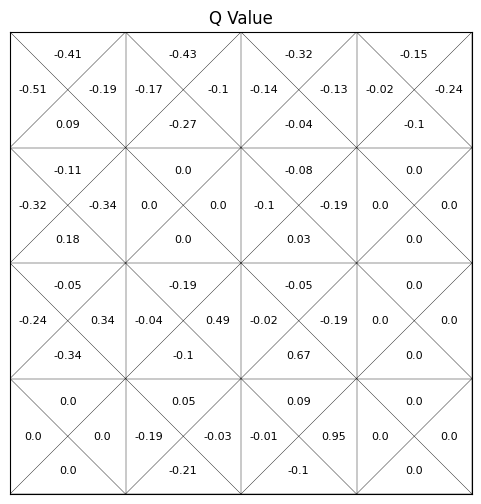

In [ ]:
def visualize_q(q_func, ax, nrow=4, ncol=4, title='Q Value') -> None:
    # visualize state-action value

    q_func = q_func.reshape([nrow, ncol, 4])

    h_ticks = np.arange(-0.5, nrow + 0.5, 1)
    v_ticks = np.arange(-0.5, ncol + 0.5, 1)

    # plot the state-action function

    im = ax.imshow(np.zeros([nrow, ncol]), alpha=0.)

    for tick in h_ticks:
        ax.axhline(tick, color='black', linewidth=0.3)

    for tick in v_ticks:
        ax.axvline(tick, color='black', linewidth=0.3)

    for h in range(len(h_ticks) - 1):
        for v in range(len(v_ticks) - 1):
            ax.plot([v_ticks[v], v_ticks[v + 1]], [h_ticks[h], h_ticks[h + 1]], color='black', linewidth=0.3)
            ax.plot([v_ticks[v], v_ticks[v + 1]], [h_ticks[h + 1], h_ticks[h]], color='black', linewidth=0.3)

    for (j, i, k), q in np.ndenumerate(q_func):
        if k == 0:
            ax.text(i - 0.3, j, np.round(q, 2), ha='center', va='center', fontsize=8)  # left
        elif k == 1:
            ax.text(i, j + 0.3, np.round(q, 2), ha='center', va='center', fontsize=8)  # bottom
        elif k == 2:
            ax.text(i + 0.3, j, np.round(q, 2), ha='center', va='center', fontsize=8)  # right
        elif k == 3:
            ax.text(i, j - 0.3, np.round(q, 2), ha='center', va='center', fontsize=8)  # top
        else:
            raise ValueError
    ax.set_title(title)

fig = plt.figure(figsize=(6, 6))

#fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
ax = fig.add_subplot(111)
ax.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)


visualize_q(action_value_grid,ax)

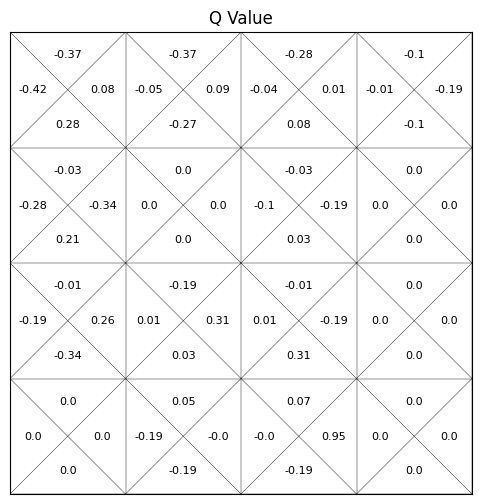

In [ ]:
fig = plt.figure(figsize=(6, 6))

#fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
ax = fig.add_subplot(111)
ax.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)


visualize_q(q_comparison,ax)

## Coding with function approximation  - Sarsa($\lambda$) algorithm

Il codice usato è ispirato al seguente codice:

https://github.com/trunghng/reinforcement_learning_an_introduction/blob/main/chapter-12/moutain_car.py


Lo pseudocodice può essere trovato nel testo di Sutton, PDF 327.

$\;$

PREMESSE :

Qui l'idea è di approssimare la funzione costo $v̂(s,\mathbf{w})$ o $\hat{q}(s,a,\mathbf{w})$ con una funzione lineare rispetto i pesi $\mathbf{w}$.

Si prenda ad esempio la funzione $v̂(s,\mathbf{w})$, si consideri il vettore:
$\mathbf{x}(s) = (x_1(s), x_2(s),...,x_d(s) )^\intercal $
detto **feature vector** dello stato $s$.
Questo ha la stessa dimensione $d$ del vettore $\mathbf{w}$.

Usando la modellizzazione lineare, abbiamo:

$v̂(s,\mathbf{w}) \doteq \mathbf{w} ^\intercal \mathbf{x}(s) = \sum_i ^d w_i x_i(s) $

il cui gradiente rispetto $\mathbf{w}$ si semplifica così:

$ \nabla v̂(s,\mathbf{w}) = \mathbf{x}(s) $


Per approfondimenti, consultare il notebook:

https://github.com/MarioFiorino/Tutorial-Reinforcement-Learning-ITA-Python/blob/main/Value_Function_Approximation_parte1_RL_ITA.ipynb


*

Nel codice seguente, sarà usato l'eligibility-traces per la stima di $\hat{q}(s,a,\mathbf{w})$, in un contesto di approssimazione di questa con un funzione lineare rispetto i pesi $\mathbf{w}$.


Per capire  le formule di update del codice, si consiglia fortemente la lettura del paragrago **12.5 True Online TD**, PDF 321 nel testo di Sutton.



### Moduli

In [1]:
import sys
import gym
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import trange
from typing import List

import warnings
warnings.filterwarnings('ignore')

### Tile Coding Software

In [14]:
#Tile Coding Software version 3.0beta by Rich Sutton
#http://incompleteideas.net/tiles/tiles3.html

"""
Tile Coding Software version 3.0beta
by Rich Sutton
based on a program created by Steph Schaeffer and others
External documentation and recommendations on the use of this code is available in the
reinforcement learning textbook by Sutton and Barto, and on the web.
These need to be understood before this code is.

This software is for Python 3 or more.

This is an implementation of grid-style tile codings, based originally on
the UNH CMAC code (see http://www.ece.unh.edu/robots/cmac.htm), but by now highly changed.
Here we provide a function, "tiles", that maps floating and integer
variables to a list of tiles, and a second function "tiles-wrap" that does the same while
wrapping some floats to provided widths (the lower wrap value is always 0).

The float variables will be gridded at unit intervals, so generalization
will be by approximately 1 in each direction, and any scaling will have
to be done externally before calling tiles.

Num-tilings should be a power of 2, e.g., 16. To make the offsetting work properly, it should
also be greater than or equal to four times the number of floats.

The first argument is either an index hash table of a given size (created by (make-iht size)),
an integer "size" (range of the indices from 0), or nil (for testing, indicating that the tile
coordinates are to be returned without being converted to indices).
"""

basehash = hash

class IHT:
    "Structure to handle collisions"
    def __init__(self, sizeval):
        self.size = sizeval
        self.overfullCount = 0
        self.dictionary = {}

    def __str__(self):
        "Prepares a string for printing whenever this object is printed"
        return "Collision table:" + \
               " size:" + str(self.size) + \
               " overfullCount:" + str(self.overfullCount) + \
               " dictionary:" + str(len(self.dictionary)) + " items"

    def count (self):
        return len(self.dictionary)

    def fullp (self):
        return len(self.dictionary) >= self.size

    def getindex (self, obj, readonly=False):
        d = self.dictionary
        if obj in d: return d[obj]
        elif readonly: return None
        size = self.size
        count = self.count()
        if count >= size:
            if self.overfullCount==0: print('IHT full, starting to allow collisions')
            self.overfullCount += 1
            return basehash(obj) % self.size
        else:
            d[obj] = count
            return count

def hashcoords(coordinates, m, readonly=False):
    if type(m)==IHT: return m.getindex(tuple(coordinates), readonly)
    if type(m)==int: return basehash(tuple(coordinates)) % m
    if m==None: return coordinates

from math import floor, log
from itertools import zip_longest

def tiles (ihtORsize, numtilings, floats, ints=[], readonly=False):
    """returns num-tilings tile indices corresponding to the floats and ints"""
    qfloats = [floor(f*numtilings) for f in floats]
    Tiles = []
    for tiling in range(numtilings):
        tilingX2 = tiling*2
        coords = [tiling]
        b = tiling
        for q in qfloats:
            coords.append( (q + b) // numtilings )
            b += tilingX2
        coords.extend(ints)
        Tiles.append(hashcoords(coords, ihtORsize, readonly))
    return Tiles

def tileswrap (ihtORsize, numtilings, floats, wrapwidths, ints=[], readonly=False):
    """returns num-tilings tile indices corresponding to the floats and ints, wrapping some floats"""
    qfloats = [floor(f*numtilings) for f in floats]
    Tiles = []
    for tiling in range(numtilings):
        tilingX2 = tiling*2
        coords = [tiling]
        b = tiling
        for q, width in zip_longest(qfloats, wrapwidths):
            c = (q + b%numtilings) // numtilings
            coords.append(c%width if width else c)
            b += tilingX2
        coords.extend(ints)
        Tiles.append(hashcoords(coords, ihtORsize, readonly))
    return Tiles

### Premesse tecniche per comprendere il codice


In [13]:
w = np.zeros(9)
x = np.random.rand(9)
w = x + w

w = np.around(w, decimals=3)
print("w            : ", w)

a = [0,1,5]
print("w[a]         : ", w[a])
w[a] += 10
print("w[a]+10      : ", w[a])
print("")
print("w            : ", w)
print("")
print("np.sum(w[a]) : ", np.sum(w[a]))

w            :  [0.591 0.003 0.114 0.982 0.66  0.77  0.161 0.321 0.704]
w[a]         :  [0.591 0.003 0.77 ]
w[a]+10      :  [10.591 10.003 10.77 ]

w            :  [10.591 10.003  0.114  0.982  0.66  10.77   0.161  0.321  0.704]

np.sum(w[a]) :  31.364


### True online Sarsa( λ ) agent


In [15]:
class TrueOnlineSarsaLambda:

    def __init__(self, env: object, lambda_: float,
            alpha: float, gamma: float, epsilon: float,
            n_tilings: int, n_eps: int, max_steps: int) -> None:
        '''
        Params
        ------
        env: OpenAI's MountainCar
        lambda_: trace decay param
        alpha: step size param
        gamma: discount factor
        epsilon: exploration param
        n_tilings:  number of tilings used for tile coding
        n_eps: number of episodes
        max_steps: maximum number of steps
        '''
        self.env = env
        self.position_scale = n_tilings / (env.high[0] - env.low[0])
        self.velocity_scale = n_tilings / (env.high[1] - env.low[1])
        self.lambda_ = lambda_
        self.alpha = alpha / n_tilings  # alpha/n_tilings nella versione originale
        self.gamma = gamma
        self.epsilon = epsilon
        self.n_tilings = n_tilings
        self.n_eps = n_eps
        self.max_steps = max_steps
        self.iht = IHT(2048)

        # NOTA : i vettori weights e trace sono inizializzati con le stesse dimensioni
        self.weights = np.zeros(2048)
        self.trace = np.zeros(2048)


    def reset(self) -> None:
        '''
        Episode initialization
        '''
        self.start_state = self.env.reset()


    def get_active_tiles(self, position: float, velocity: float,
            action: int, terminated: bool=None) -> List[int]:
        '''
        Get (indices of) active tiles corresponding to
        state-action pair [[@position, @velocity], @action]
        (i.e., index of the tile in each tilings where the value = 1)

        Params
        ------
        position: position of the car
        velocity: velocity of the car
        action: action taken at the state [@position, @velocity]
        terminated: whether the car is in terminal state

        Return
        ------
        active_tiles: list of (indices of) active tiles
        '''
        if terminated is not None and terminated:
            return []
        active_tiles = tiles(self.iht, self.n_tilings,
            [position * self.position_scale, velocity
            * self.velocity_scale], [action])
        return active_tiles #active_tiles = [0, 1, 90, 3, 87, 78, 6, 81]


    def get_value(self, position: float, velocity: float,
            action: int, terminated: bool=None) -> float:
        '''
        Get state-action value of state-action pair [[@position, @velocity], @action]
        Since the feature vector is one-hot and we are using linear function approx
        => value at [[@position, @velocity], @action] is exactly the
            total of weight corresponding to [[@position, @velocity], @action]

        Params
        ------
        position: position of the car
        velocity: velocity of the car
        action: action taken at the state [@position, @velocity]
        terminated: whether the car is in terminal state

        Return
        ------
        value: state-action value
        '''
        if terminated is not None and terminated:
            return 0

        active_tiles = self.get_active_tiles(position, velocity, action)

        value = np.sum(self.weights[active_tiles])

        return value   # value = -0.7795991772541548


    def get_value_with_active_tiles(self, active_tiles: List[int],
            terminated: bool=None) -> float:
        '''
        Get state-action value with list of active tiles

        Params
        ------
        active_tiles: list of (indices of) active tiles
        terminated: whether the car is in terminal state

        Return
        ------
        value: state-action value
        '''
        if terminated is not None and terminated:
            return 0
        value = np.sum(self.weights[active_tiles])
        return value


    def epsilon_greedy(self, position: float, velocity: float) -> int:

        n_actions = self.env.action_space.n
        available_actions = {0,1,2}

        values = np.array([self.get_value(position, velocity, action_) for action_ in range(n_actions)])
        #values = [-151.90793727 -144.34094926 -129.96974806]
        action = np.argmax(values)   # act greedy
        # action = 2

        if np.random.uniform(0, 1.0) > self.epsilon :
            non_greedy_actions = list(available_actions - {action})
            action = np.random.choice(non_greedy_actions)

        return action  # action extracted


    def learn(self, error: float) -> None:
        '''
        Update weight vector @self.weights

        Params
        ------
        error: error
        '''
        self.weights += self.alpha * error


    def update_trace(self, active_tiles: List[int]) -> None:
        '''
        Update trace vector as a dutch trace

        Params
        ------
        active_tiles: list of (indices of) active tiles
        '''
        delta = 1 - self.alpha * self.gamma * self.lambda_ * np.sum(self.trace[active_tiles])

        self.trace *= self.gamma * self.lambda_  # tutti i componenti del vettore self.trace decrementano
        # di un fattore: self.gamma * self.lambda_ =  0.36
        self.trace[active_tiles] += delta # solo i componenti attivi del vettore: "self.trace[active_tiles]"
        # sono incrementati del fattore "delta"


    def run(self, current_ep: int) -> int:
        '''
        Perform an episode

        Params
        ------
        current_ep: current episode

        Return
        ------
        total_reward: total reward in the episode
        '''
        self.reset()

        position, velocity = self.start_state
        action = self.epsilon_greedy(position, velocity)
        active_tiles = self.get_active_tiles(position, velocity, action)

        old_action_value = 0
        total_reward = 0
        n_steps = 0

        while True:
            n_steps += 1

            #if current_ep + 20 >= self.n_eps:
            #    self.env.render()

            next_state, reward, terminated, _ = self.env.step(action)
            total_reward += reward

            next_position, next_velocity = next_state
            next_action = self.epsilon_greedy(next_position, next_velocity)
            next_active_tiles = self.get_active_tiles(next_position, next_velocity, next_action, terminated)

            action_value = self.get_value_with_active_tiles(active_tiles)
            next_action_value = self.get_value_with_active_tiles(next_active_tiles, terminated)

            td_error = reward + self.gamma * next_action_value - action_value

            self.update_trace(active_tiles)  # qui ricaviamo il valore di self.trace aggiornato
            # allo stato corrente "active_tiles"

            error = (td_error + action_value - old_action_value) * self.trace
            error[active_tiles] -= action_value - old_action_value

            self.learn(error) # qui aggiorna il weight vector: self.weights += self.alpha * error

            old_action_value = next_action_value
            active_tiles = next_active_tiles
            action = next_action

            if terminated:
                break
            elif n_steps >= self.max_steps:
                #print('Max #steps reached!')
                break

        return total_reward


In [16]:
def true_online_sarsa_lambda_plot() -> None:
    '''
    True online Sarsa(lambda) algorithm plotting
    '''
    env = gym.make('MountainCar-v0').env
    n_eps = 500
    alpha = 0.03
    lambda_ = 0.4  # possibile modulare il contenuto di lambda da 0.99 a  0
    epsilon = 0.85
    gamma = 0.9
    n_tilings = 8
    max_steps = 1_000 # max step per episodio

    reward_list = []
    ave_reward_list = []

    true_online_sarsa_lambda = TrueOnlineSarsaLambda(env, lambda_, alpha,
        gamma, epsilon, n_tilings, n_eps, max_steps)

    for ep in trange(n_eps):
        total_reward = true_online_sarsa_lambda.run(ep)

        reward_list.append(total_reward)

        if (ep + 1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []

        if (ep + 1) % 100 == 0:
            print('Episode {} Average Reward: {}'.format(ep + 1, ave_reward))

    env.close()
    plt.plot(100 * (np.arange(len(ave_reward_list)) + 1), ave_reward_list)
    plt.xlabel('Episodes')
    plt.ylabel('Average Reward')
    plt.title('Average Reward vs Episodes')
    plt.savefig('./mountain-car-true-online-sarsa-lambda.png')
    plt.close()

In [17]:
#MAIN

true_online_sarsa_lambda_plot()

#if __name__ == '__main__':
#    true_online_sarsa_lambda_plot()

 20%|██        | 102/500 [00:11<00:28, 13.73it/s]

Episode 100 Average Reward: -594.2


 41%|████      | 204/500 [00:16<00:11, 25.47it/s]

Episode 200 Average Reward: -230.68


 61%|██████    | 303/500 [00:20<00:07, 26.94it/s]

Episode 300 Average Reward: -202.88


 80%|████████  | 400/500 [00:23<00:03, 28.63it/s]

Episode 400 Average Reward: -195.59


100%|██████████| 500/500 [00:28<00:00, 17.44it/s]


Episode 500 Average Reward: -194.93


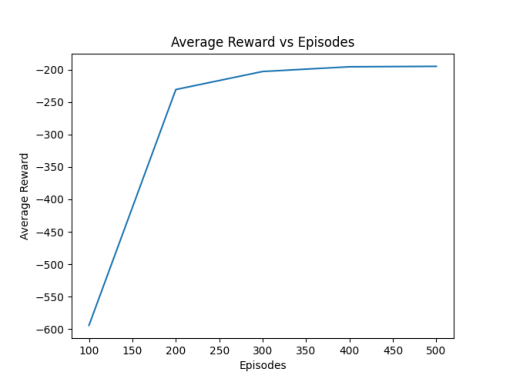

In [18]:
# Resume del training

img = mpimg.imread('/content/mountain-car-true-online-sarsa-lambda.png')
plt.imshow(img)
plt.axis('off')
plt.show()